In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import pandas as pd
import time


options = Options()
options.headless = True

# Download page
browser = webdriver.Chrome(options=options)
browser.get('https://breakingbad.fandom.com/wiki/Uno')
soup = BeautifulSoup(browser.page_source, 'html.parser')

In [25]:
# Get number of live viewers
def get_live_viewers_count(soup):
    selectors = soup.find_all('h3', {'class': 'pi-data-label'})
    for selector in selectors:
        if selector.get_text() == 'U.S. Viewers':
            return selector.findNextSibling('div').get_text().replace('(live / total)', '').split('/')[0]
    
# num_live_viewers = get_live_viewers_count(soup)
# print('# live viewers:', num_live_viewers)

In [28]:
""" Get the number of featured music """
def get_featured_music_count(soup):
    selector = soup.find('span', {'id': 'Featured_Music'})
    if selector is None:
        return 0
    selector = selector.parent.next_sibling.next_sibling
    return len(selector.find_all('li'))

# num_featured_music = get_featured_music_count(soup)
# print('# featured music:', num_featured_music)

In [24]:

def get_media_ref_count(soup):
    selector = soup.find('span', {'id': 'References_to_other_media'})
    if selector is None:
        return 0
    selector = selector.parent.findNext('ul')
    return len(selector.find_all('li'))

# num_media_refs = get_media_ref_count(soup)
# print('# media references:', num_media_refs)

In [23]:
def get_plot(soup):

    plot = []

    """ Extract text from Summary """
    selector = soup.find('span', {'id': 'Teaser'})
    txt = selector.parent.findNextSibling('p', {'class': None}).get_text()
    plot.append(txt)

    """ Extract text from each 'Act' """
    selectors = soup.find_all('span', {'id': lambda x: x and x.startswith('Act_')})
    for selector in selectors:
        txt = selector.parent.findNextSibling('p').get_text()
        plot.append(txt)

    # Clean up special characters
    for i, txt in enumerate(plot):
        txt = txt.replace(u'\xa0', u' ').replace('\n', '').replace("\'", '')
        plot[i] = txt
        
    plot = (' ').join(plot)
        
    return plot
    
# print(plot)

## Get list of URLs for each season

In [32]:
# Easier to hard code this

def get_season_urls():
    seasonUrls = [f'https://breakingbad.fandom.com/wiki/Season_{i+1}_(Better_Call_Saul)' for i in range(5)]
    return seasonUrls
    

seasonUrls = get_season_urls()
for i, url in enumerate(seasonUrls):
        print(f'Season {i+1}: {url}')

Season 1: https://breakingbad.fandom.com/wiki/Season_1_(Better_Call_Saul)
Season 2: https://breakingbad.fandom.com/wiki/Season_2_(Better_Call_Saul)
Season 3: https://breakingbad.fandom.com/wiki/Season_3_(Better_Call_Saul)
Season 4: https://breakingbad.fandom.com/wiki/Season_4_(Better_Call_Saul)
Season 5: https://breakingbad.fandom.com/wiki/Season_5_(Better_Call_Saul)


## Get list of URLs for each episodes

In [26]:
# Get list of episodes
def get_episode_urls(url):
    baseUrl = 'https://breakingbad.fandom.com'
    
    # Download page
    browser = webdriver.Chrome(options=options)
    browser.get(url)
    soup = BeautifulSoup(browser.page_source, 'html.parser')
    
    # Extract episode URLs
    episodeUrls = []
    selector = soup.find('div', {'data-source': 'episodes'})
    for link in selector.find_all('a'):
        url = f'{baseUrl}{link["href"]}'
        episodeUrls.append(url)
    return episodeUrls
        
episodeUrls = get_episode_urls('https://breakingbad.fandom.com/wiki/Season_1_(Better_Call_Saul)')

for i, url in enumerate(episodeUrls):
    print(f'Episode {i+1}: {url}')

Episode 1: https://breakingbad.fandom.com/wiki/Uno
Episode 2: https://breakingbad.fandom.com/wiki/Mijo
Episode 3: https://breakingbad.fandom.com/wiki/Nacho
Episode 4: https://breakingbad.fandom.com/wiki/Hero
Episode 5: https://breakingbad.fandom.com/wiki/Alpine_Shepherd_Boy
Episode 6: https://breakingbad.fandom.com/wiki/Five-O
Episode 7: https://breakingbad.fandom.com/wiki/Bingo
Episode 8: https://breakingbad.fandom.com/wiki/RICO
Episode 9: https://breakingbad.fandom.com/wiki/Pimento
Episode 10: https://breakingbad.fandom.com/wiki/Marco


In [29]:
def extract_episode_data(url, season_number, episode_number):
    # Download page
    browser = webdriver.Chrome(options=options)
    browser.get(url)
    soup = BeautifulSoup(browser.page_source, 'html.parser')
    
    # Extract data
    data = {}
    data['season'] = season_number + 1
    data['episode'] = episode_number + 1
    data['live_viewership'] = get_live_viewers_count(soup)
    data['featured_music'] = get_featured_music_count(soup)
    data['media/cultural_refs'] = get_media_ref_count(soup)
    data['plot'] = get_plot(soup)
    
    return data


data = {}
season_number = 1    # hard-coded for testing purpose
for i, url in enumerate(episodeUrls):
    print(f'Extracting episode {i+1}: {url}')
    data[i+1] = extract_episode_data(url, season_number, i)
    time.sleep(3)

Extracting episode 1: https://breakingbad.fandom.com/wiki/Uno
Extracting episode 2: https://breakingbad.fandom.com/wiki/Mijo
Extracting episode 3: https://breakingbad.fandom.com/wiki/Nacho
Extracting episode 4: https://breakingbad.fandom.com/wiki/Hero
Extracting episode 5: https://breakingbad.fandom.com/wiki/Alpine_Shepherd_Boy
Extracting episode 6: https://breakingbad.fandom.com/wiki/Five-O
Extracting episode 7: https://breakingbad.fandom.com/wiki/Bingo
Extracting episode 8: https://breakingbad.fandom.com/wiki/RICO
Extracting episode 9: https://breakingbad.fandom.com/wiki/Pimento
Extracting episode 10: https://breakingbad.fandom.com/wiki/Marco


In [30]:
df = pd.DataFrame.from_dict(data, orient='index')
df

,season,episode,live_viewership,featured_music,media/cultural_refs,plot
1,2,1,6.88m,8,2,"In a monochrome flash-forward sequence, set af..."
2,2,2,3.42m,6,1,Tuco is preparing salsa in his kitchen when hi...
3,2,3,3.23m,3,3,"Some time in the past, Chuck goes to a jail to..."
4,2,4,2.87m,10,3,"In a flashback, Jimmy (under the alias ""Saul G..."
5,2,5,2.71m,5,0,Two cops arrive at Chucks house after his neig...
6,2,6,2.57m,3,0,"In a flashback, Mike arrives in Albuquerque by..."
7,2,7,2.67m,4,4,"Late at night, Jimmy and Mike wait for the Phi..."
8,2,8,2.87m,2,0,"In a flashback, a jubilant Jimmy pushes a mail..."
9,2,9,2.38m,1,2,A short while after Chuck surprised both Jimmy...
10,2,10,2.53m,13,0,"In a flashback to 1992 in Cicero, Illinois, sh..."


# Extract data for every episode in every season

In [33]:
data = []
for season, seasonUrl in enumerate(get_season_urls()):
    for episode, episodeUrl in enumerate(get_episode_urls(seasonUrl)):
        print(f'Season {season+1}, Episode {episode+1}: {episodeUrl}')
        d = extract_episode_data(episodeUrl, season, episode)
        data.append(d)
        time.sleep(1)

Season 1, Episode 1: https://breakingbad.fandom.com/wiki/Uno
Season 1, Episode 2: https://breakingbad.fandom.com/wiki/Mijo
Season 1, Episode 3: https://breakingbad.fandom.com/wiki/Nacho
Season 1, Episode 4: https://breakingbad.fandom.com/wiki/Hero
Season 1, Episode 5: https://breakingbad.fandom.com/wiki/Alpine_Shepherd_Boy
Season 1, Episode 6: https://breakingbad.fandom.com/wiki/Five-O
Season 1, Episode 7: https://breakingbad.fandom.com/wiki/Bingo
Season 1, Episode 8: https://breakingbad.fandom.com/wiki/RICO
Season 1, Episode 9: https://breakingbad.fandom.com/wiki/Pimento
Season 1, Episode 10: https://breakingbad.fandom.com/wiki/Marco
Season 2, Episode 1: https://breakingbad.fandom.com/wiki/Switch
Season 2, Episode 2: https://breakingbad.fandom.com/wiki/Cobbler
Season 2, Episode 3: https://breakingbad.fandom.com/wiki/Amarillo
Season 2, Episode 4: https://breakingbad.fandom.com/wiki/Gloves_Off
Season 2, Episode 5: https://breakingbad.fandom.com/wiki/Rebecca
Season 2, Episode 6: https://

In [45]:
df = pd.DataFrame(data)
df


,season,episode,live_viewership,featured_music,media/cultural_refs,plot
0,1,1,6.88m,8,2,"In a monochrome flash-forward sequence, set af..."
1,1,2,3.42m,6,1,Tuco is preparing salsa in his kitchen when hi...
2,1,3,3.23m,3,3,"Some time in the past, Chuck goes to a jail to..."
3,1,4,2.87m,10,3,"In a flashback, Jimmy (under the alias ""Saul G..."
4,1,5,2.71m,5,0,Two cops arrive at Chucks house after his neig...
5,1,6,2.57m,3,0,"In a flashback, Mike arrives in Albuquerque by..."
6,1,7,2.67m,4,4,"Late at night, Jimmy and Mike wait for the Phi..."
7,1,8,2.87m,2,0,"In a flashback, a jubilant Jimmy pushes a mail..."
8,1,9,2.38m,1,2,A short while after Chuck surprised both Jimmy...
9,1,10,2.53m,13,0,"In a flashback to 1992 in Cicero, Illinois, sh..."


In [286]:
df.to_csv('better_call_saul.csv')

In [ ]:
df.featured_music.plot()

In [3]:
import matplotlib.pyplot as plt


In [46]:
df.head()

,season,episode,live_viewership,featured_music,media/cultural_refs,plot
0,1,1,6.88m,8,2,"In a monochrome flash-forward sequence, set af..."
1,1,2,3.42m,6,1,Tuco is preparing salsa in his kitchen when hi...
2,1,3,3.23m,3,3,"Some time in the past, Chuck goes to a jail to..."
3,1,4,2.87m,10,3,"In a flashback, Jimmy (under the alias ""Saul G..."
4,1,5,2.71m,5,0,Two cops arrive at Chucks house after his neig...


In [47]:
df['live_viewership']= df['live_viewership'].apply(lambda x: x.replace('m', '')).apply(float)
df.head()

,season,episode,live_viewership,featured_music,media/cultural_refs,plot
0,1,1,6.88,8,2,"In a monochrome flash-forward sequence, set af..."
1,1,2,3.42,6,1,Tuco is preparing salsa in his kitchen when hi...
2,1,3,3.23,3,3,"Some time in the past, Chuck goes to a jail to..."
3,1,4,2.87,10,3,"In a flashback, Jimmy (under the alias ""Saul G..."
4,1,5,2.71,5,0,Two cops arrive at Chucks house after his neig...


<AxesSubplot:>

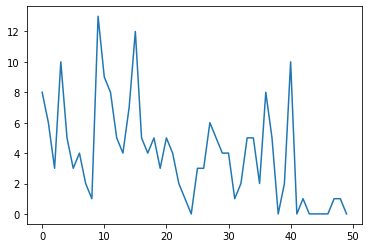

In [20]:
df['featured_music'].plot()


In [48]:
df.to_csv('better_call_saul.csv')

In [49]:
df = pd.read_csv('better_call_saul.csv')
df.head()

,Unnamed: 0,season,episode,live_viewership,featured_music,media/cultural_refs,plot
0,0,1,1,6.88,8,2,"In a monochrome flash-forward sequence, set af..."
1,1,1,2,3.42,6,1,Tuco is preparing salsa in his kitchen when hi...
2,2,1,3,3.23,3,3,"Some time in the past, Chuck goes to a jail to..."
3,3,1,4,2.87,10,3,"In a flashback, Jimmy (under the alias ""Saul G..."
4,4,1,5,2.71,5,0,Two cops arrive at Chucks house after his neig...
